# Scope

A scope is the outline of a story about why we are working on a problem (and about how we expect that story to end). The four parts of a scope are (CoNVO)-

1. **Context**: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

2. **Needs**: Using ML tools understand what sorts of people were likely to survive in the wreck of titanic. Finally, predict which passengers survived the tragedy.When we correctly explain a need, we are clearly laying out what it is that could be improved by better knowledge.

3. **Vision** (what sucess looks like): If we got our ML correct, then we will predict which of the passengers in the test set survived correctly. 

4. **Outcome** (how will this be used in the future): learn ML skillset 


# Setting up the Modules

In [2]:
# Fundamental packages.
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# This is based on the assumption that I will do decision tree classifer. Although, there is better way to make that decision. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load Data 

In [3]:
# Import Data

train = pd.read_csv('../Data/titanic/train.csv')
test = pd.read_csv('../Data/titanic/test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration and Preperation Path

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing values treatment
- Outlier treatment
- Variable transformation
- Variable creation

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model

## Variable Identification

Identify Features (Input) and Label (output) variables

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
features =  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

label = train['Survived']

In [6]:
train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [7]:
train['Survived'].dtypes

dtype('int64')

**Data Types and Categories of Features**

Categorical: 
- Nominal: Name, Sex, Cabin, Embraked 
- Ordinal: PassengerId, Pclass. 

Quantitiave: 
- Discreate: Age, sibsp, parch
- Contineous: Fare

Label: Survived is binary (0: did not survive)

## Univariate Analysis

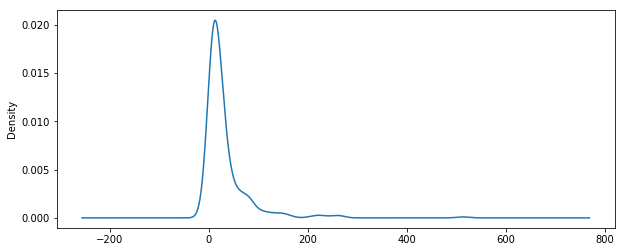

In [8]:
train['Fare'].plot(kind = 'density', figsize = (10, 4))

Notes: Majortity of the passengers paid somewhere between 0 to 150. But there other who paid much higer fare. Because of the missing data, we can see negative

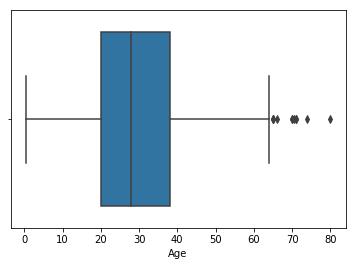

In [9]:
sns.boxplot(x='Age', data=train);

Notes: Median age is about 28. 25% of population is below 20 years. 75% of passengers are below 40. 

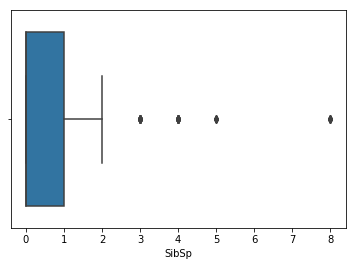

In [10]:
sns.boxplot(x = 'SibSp', data = train)

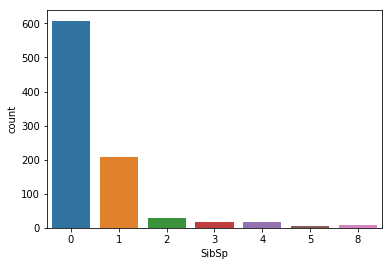

In [11]:
sns.countplot(x = 'SibSp', data = train)

Notes: All most all passengers expect for 4, have <= 2 siblings or soupse on board. 

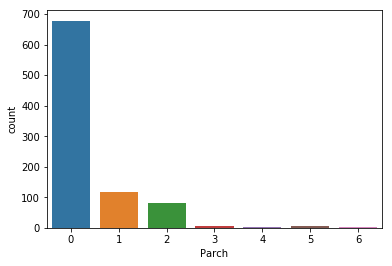

In [12]:
sns.countplot(x = 'Parch', data = train)

Notes: Majority passengers had parents or childer on board with them. 

# Multivariate Analysis

### Sex Survival

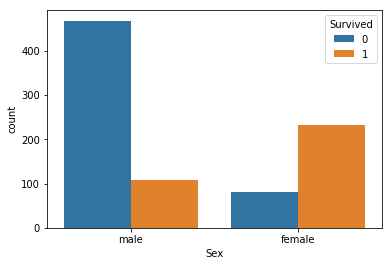

In [13]:
# Sex Survival
sns.countplot('Sex', data=train, hue='Survived')

Notes: Sex is a important feature (independent variable) for the output label survived. Close to 500 (83%) males in training set did not survive the ill-fated trip. While 100 females (33%) did not. 

The bais suggests there is a possbility of delibrate attempts made for the survival of females. 
    

### Parents and Children Surviva

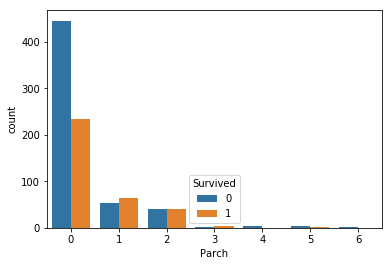

In [14]:
# Parents and Children Survival 
sns.countplot('Parch', data=train, hue='Survived')

Notes: Parents and Childer is also important.

### By Pclass

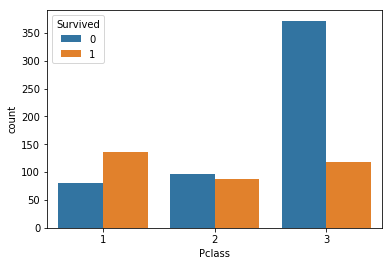

In [15]:
sns.countplot('Pclass', data = train, hue='Survived')

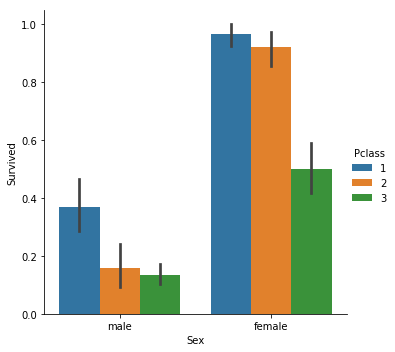

In [16]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train);

Notes: Pclass is also import. 3rd class passengers are the made the bulk of fatalites

### By Age

In [52]:
# Since each passenger's age is discrete, we cant use count plot and hence we need to bucktize.
# Before touching the train or test data, i will create a subset to understand age impacts on survival
suvival_by_age = ['Age', 'Survived']
age_data = train[suvival_by_age]
age_data["Age"] = age_data["Age"].fillna(-0.5)
age_data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


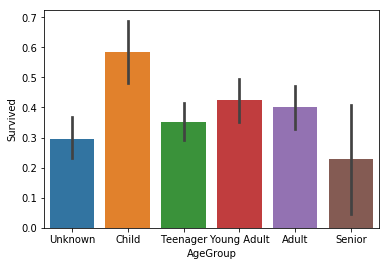

In [46]:
# Creating Bins
bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
age_data['AgeGroup'] = pd.cut(age_data["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=age_data)
plt.show()


Note: Clearly Age determined survival rate

### Embarked 

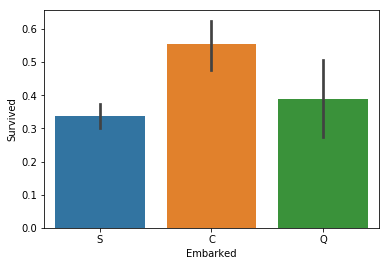

In [50]:
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

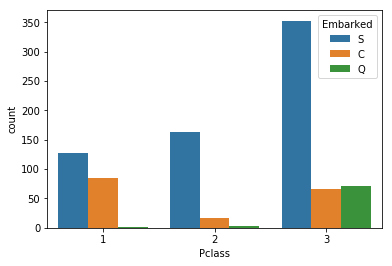

In [51]:
sns.countplot('Pclass', data = train, hue='Embarked')

Note: Majority of Cherbourg survived because they are in pclass 1

In [30]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Mrs. James Joseph (Margaret Tobin)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


# Missing Values

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Note: Age, Cabin, and Embraked have missing data.

# Dropping

1. Since 687 values are missing from cabin (cabin number), it is safe to drop the entire feature
2. Tickets has duplicates.
3. Age, Embark has important correlation

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [54]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

# Variable Creation
- Creating new feature extracting from existing

### Title of a passenger and Survival

In [55]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [56]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
